In [1]:
import torch

from torch.nn import Linear, Module, MSELoss

from torch.optim import SGD

import numpy as np

In [2]:
train = np.arange(0, 1, 0.01)

label = train * 0.5 + 1

train = torch.tensor(train, dtype=torch.float32).view(-1, 1)

label = torch.tensor(label, dtype=torch.float32).view(-1, 1)

assert len(train) == len(label), "Fail !"

In [3]:
class Modela(Module):
  """
  Model Class
  """
  def __init__(self):
    """
    Define Linear Layer
    """
    super(Modela, self).__init__()

    self.linear = Linear(1, 1)

  def forward(self, i):
    """
    Forward Propagation
    """
    return self.linear(i)

model = Modela()

In [4]:
torch.cuda.is_available()

False

In [5]:
alpha = 0.01

mseloss = MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=alpha)

In [6]:
losslist = []

loop = 500

for i in range(loop):

  model.train()

  optimizer.zero_grad()

  logits = model(train)

  loss = mseloss(logits, label)

  losslist.append(loss.item())

  loss.backward()

  optimizer.step()

In [7]:
losslist[0]

1.6411774158477783

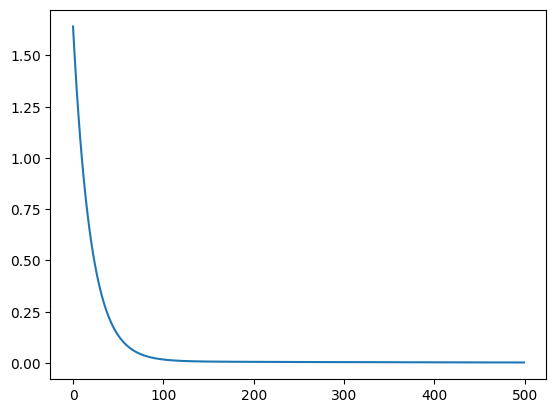

In [8]:
import matplotlib.pyplot as plt

plt.plot(losslist);

In [9]:
model.eval()

with torch.no_grad():

  resulta = model(train)

losses = mseloss(resulta, label)

losses.item()

0.0024384749121963978

In [10]:
model.state_dict()['linear.weight'].item()

0.3301720917224884

In [11]:
model.state_dict()['linear.bias'].item()

1.090002417564392

In [12]:
torch.save(model, 'linear.pth')

In [ ]:
loaded = torch.load('linear.pth', weights_only=False)

loaded.eval()